<a href="https://colab.research.google.com/github/eunoiabout/PictureBook_Project/blob/main/3_group4_mattrbyauthor_ccw_wordcloud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🐹🐾 <font color = 'green'>>**Converting compiled .txt to csv:** <font color = 'pink'>_This stage can be skipped if you have already done it_.

In [ ]:
!pip install pandas
!pip install lexical_diversity
import pandas as pd #Import Pandas Package
import lexical_diversity as ld
import glob

#Cloning your repository and set up your current working directory 🍎🍎🍎🍎🍎
!git clone https://github.com/eunoiabout/PictureBook_Project
%cd /content/PictureBook_Project/Data_Frame

# Load all .txt files of your current working directory
fns = glob.glob('*.txt')

# List to hold each temporary DataFrame
df_list = []

# Load each file and append to list
for fn in fns:
    dftmp = pd.read_csv(fn, sep='@')
    df_list.append(dftmp)

# Concatenate all and reset index
df = pd.concat(df_list, ignore_index=True)

# Save as CSV 🍎🍎🍎🍎🍎
df.to_csv("./2creators_6books.csv", index=False)

# Display the DataFrame
print(df)
df



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.8/117.8 kB 3.7 MB/s eta 0:00:00
Cloning into 'PictureBook_Project'...
remote: Enumerating objects: 76, done.
remote: Counting objects: 100% (76/76), done.
remote: Compressing objects: 100% (72/72), done.
remote: Total 76 (delta 30), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (76/76), 2.31 MiB | 4.64 MiB/s, done.
Resolving deltas: 100% (30/30), done.
/content/PictureBook_Project/Data_Frame
                                                text  \
0  at the back of the north wind   chapter i the ...   
1  the light princess   contents     1  what no c...   
2  the princess and the goblin  contents      1  ...   
3  the enchanted island of yew   contents     1  ...   
4  the master key   contents      who knows     1...   
5  the wonderful wizard of oz    contents   intro...   

                               title           creator  
0      At the Back of the North Wind  George MacDonald  
1  The Light Princess and the

,text,title,creator
0,at the back of the north wind chapter i the ...,At the Back of the North Wind,George MacDonald
1,the light princess contents 1 what no c...,The Light Princess and the Goblin,George MacDonald
2,the princess and the goblin contents 1 ...,The Princess and the Goblin,George MacDonald
3,the enchanted island of yew contents 1 ...,The Enchanted Island of Yew,L.Frank Baum
4,the master key contents who knows 1...,The Master Key,L.Frank Baum
5,the wonderful wizard of oz contents intro...,The Wonderful Land of Oz,L.Frank Baum


In [ ]:
import pandas as pd
from lexical_diversity import lex_div as ld

# Load the CSV (skip if already loaded) 🍎🍎🍎🍎🍎
df = pd.read_csv("./2creators_6books.csv", sep=",")

# <font color = 'blue'> **Getting TTR and MATTR** (based on N_tokens and N_lemmas) including ['Data Size] using len( )

In [ ]:
!pip install textstat
import textstat

# Added column: String length for estimating data size
length = []

for i in range(0, len(df['text'])):
  LEN = len(df['text'][i])
  length.append(LEN)

df['Data size'] = length


# Added columns:  Number of Splitted words & Length of splitted words
tsplit = []
splen = []

for i in range(0, len(df['text'])):
  TSP = df['text'][i].split()
  SPLEN = len(TSP)
  tsplit.append(TSP)
  splen.append(SPLEN)

df['Splits'] = tsplit
df['N_Splits'] = splen

# Added column: Lemma 표제어
#df['Lemma'] is a column from a pandas DataFrame, so len(df['Lemma']) gives you the number of rows (or entries) in that column.
lemma = []

for i in range(0, len(df['text'])):
  LEM = ld.flemmatize(df['text'][i])
  print(LEM)
  lemma.append(LEM)

df['Lemma'] = lemma


# ADD Lexical Diversity indices

#1. Create two empty lists--one for Type to Token Ratio and the other Moving Average Type to Token Ratio.
TTR = []
MATTR = []

#2. Getting LD index values for each cell:

for i in range(0, len(df['Lemma'])):
  flt = df['Lemma'][i]
  ttr = ld.ttr(flt)
  mattr = ld.mattr(flt)

  #2-1. Add values to each list
  TTR.append(ttr)
  MATTR.append(mattr)


#3. Add columns for TTR and MATTR
df['TTR'] = TTR
df['MATTR'] = MATTR

print(df)
df_selected = df[['creator','N_Splits','MATTR']]
df_selected



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.3/175.3 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 939.4/939.4 kB 34.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 39.8 MB/s eta 0:00:00
['at', 'the', 'back', 'of', 'the', 'north', 'wind', 'chapter', 'i', 'the', 'hayloft', 'i', 'have', 'be', 'ask', 'to', 'tell', 'you', 'about', 'the', 'back', 'of', 'the', 'north', 'wind', 'a', 'old', 'greek', 'writer', 'mention', 'a', 'people', 'who', 'live', 'there', 'and', 'be', 'so', 'comfortable', 'that', 'they', 'could', 'not', 'bear', 'it', 'any', 'long', 'and', 'drown', 'themselves', 'my', 'story', 'be', 'not', 'the', 'same', 'as', 'his', 'i', 'do', 'not', 'think', 'herodotus', 'have', 'get', 'the', 'right', 'account', 'of', 'the', 'place', 'i', 'be', 'go', 'to', 'tell', 'you', 'how', 'it', 'fare', 'with', 'a', 'boy', 'who', 'go', 'there', 'he', 'live', 'in', 'a', 'low', 'room', 'over', 'a', 'coachhouse', 'and', 'that', 'be', 'not', 'by', 'any', 

,creator,N_Splits,MATTR
0,George MacDonald,88933,0.766522
1,George MacDonald,15098,0.765234
2,George MacDonald,51215,0.771980
3,L.Frank Baum,37179,0.794675
4,L.Frank Baum,35003,0.805804
5,L.Frank Baum,39631,0.773837


# <font color = 'green'> **MATTR for each creator** (average across different volumes for each creator)

In [ ]:
# Clean up creator names
df['creator'] = df['creator'].str.strip().str.lower()

df_creator_ld = df.groupby("creator")['MATTR'].mean().reset_index()
df_creator_ld = df_creator_ld.round(6)

# --- STEP 6: Save and display results ---
df_creator_ld.to_csv('LD_by_creator.csv', index=False)
print("✅ Lexical diversity by creator saved as 'LD_by_creator.csv'!\n")
df_creator_ld

✅ Lexical diversity by creator saved as 'LD_by_creator.csv'!



,creator,MATTR
0,george macdonald,0.767912
1,l.frank baum,0.791438


#<font color = 'red'> **Common Core Words for all 2 creators saved in a single .csv file**

In [ ]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
from collections import Counter

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

# Load the dataset 🍎🍎🍎🍎🍎
file_path = "/content/PictureBook_Project/Data_Frame/2creators_6books.csv"  # Change to your actual file name/content/pg_5authors_16books.csv
df_ccw = pd.read_csv(file_path)
# Ensure the text column exists
if 'text' not in df_ccw.columns or 'creator' not in df_ccw.columns:
    raise ValueError("CSV file must contain 'text' and 'creator' columns.")

# Combine all text data into one large string
all_text = " ".join(df_ccw['text'].astype(str))

# Tokenize words
words = word_tokenize(all_text.lower())  # Convert to lowercase

# Remove punctuation and stopwords
stop_words = set(stopwords.words('english'))
words = [word for word in words if word.isalpha() and word not in stop_words]  # Keep only words, no numbers/symbols

# Count word frequencies
word_counts = Counter(words)

# Convert to a DataFrame
common_words_df = pd.DataFrame(word_counts.most_common(100), columns=['Word', 'Frequency'])  # Top 100 words

# Save to CSV 🍎🍎🍎🍎🍎
common_words_df.to_csv("2creators_common_core_words.csv", index=False)

print("Common core words extracted and saved as '2creators_common_core_words.csv'!")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Common core words extracted and saved as '2creators_common_core_words.csv'!


# <font color = 'sky blue'> **Creating a word cloud** based on Common Core Words(CCW)

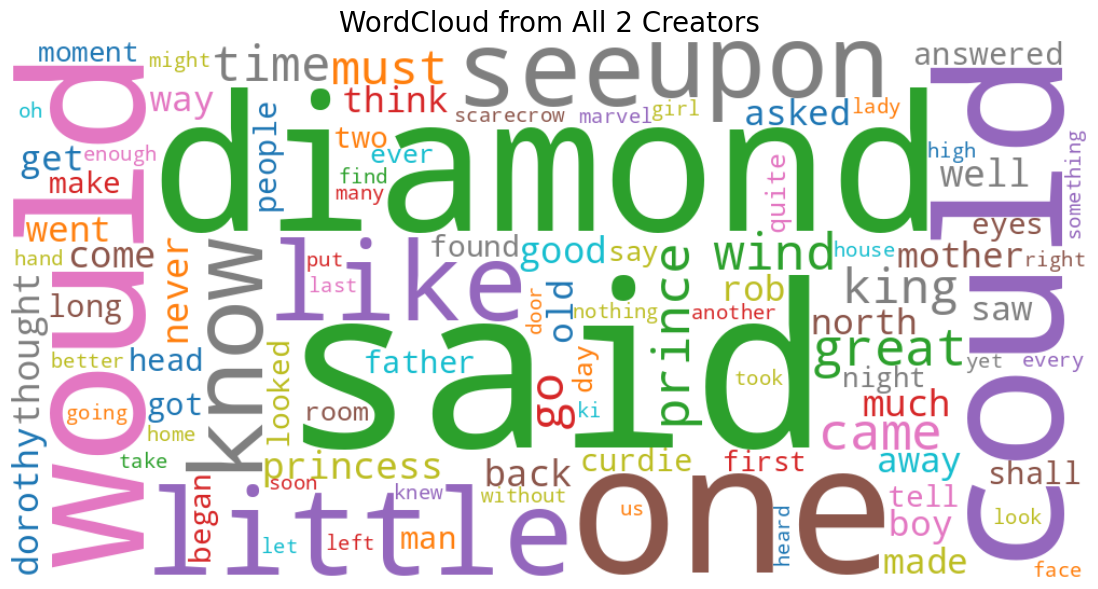

In [ ]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Path to the combined CSV file (not a folder)🍎🍎🍎🍎🍎
input_file = "/content/PictureBook_Project/Data_Frame/2creators_common_core_words.csv"

# Read the CSV containing word-frequency pairs
df = pd.read_csv(input_file)

# Convert to dictionary: {'word1': freq1, 'word2': freq2, ...}
word_freq = dict(zip(df['Word'], df['Frequency']))

# Create and generate the word cloud
wc = WordCloud(width=1000, height=500, background_color='white', colormap='tab10')
wc.generate_from_frequencies(word_freq)

# Display the word cloud inline in Colab
plt.figure(figsize=(15, 7))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud from All 2 Creators", fontsize=20)
plt.show()